In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.linear_model import LinearRegression

# **Завантаження і аналіз датасету**

In [ ]:
path = kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")
path += '/User Listening History.csv'

100%|██████████| 639M/639M [00:11<00:00, 60.7MB/s]

Extracting files...


In [ ]:
df = pd.read_csv(path, on_bad_lines='skip')
df.shape

(9711301, 3)

In [ ]:
df.columns

Index(['track_id', 'user_id', 'playcount'], dtype='object')

Переглянемо декілька рядків датасету. Він містить 9711301 рядки та 3 колонки (айді треку, айді користувача та кількість прослуховувань)

In [ ]:
df.sample(5)

,track_id,user_id,playcount
9068913,TRVYJCY128F92DE225,8a8843ed206800fecc732972a3c7ea886ce42560,4
7825314,TRPNXRO128F93113FA,b09c26263438f974abb984ea6e396c1d77e43a9a,1
767375,TRGTZPL12903CBCD8A,dc652433d8d865e7010c3263d626bdfa1ee25c5c,2
3730411,TRXDINI128F146B94D,0f2911ebacf1799e9dd4183018d9106497070fe9,1
7704915,TRONYHY128F92C9D11,48cf8f8b1e436dbb86d746f2901ff05393e9f80d,1


Переглянемо та проаналізуємо кількість відсутніх значень. Вони відсутні

In [ ]:
null_cols = df.columns[df.isna().sum() > 0]
null_cols

Index([], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB


Переглянемо кількість та відношення унікальних значень кожної колонки

In [ ]:
df_shape = df.shape
for col in df.columns:
  uniq = df[col].nunique()
  print(f'{col:<15} {uniq:<10} {uniq / df_shape[0] * 100:.4f}%')

track_id        30459      0.3136%
user_id         962037     9.9064%
playcount       430        0.0044%


In [ ]:
def minMaxNormalization(data):
  return (data - data.min()) / (data.max() - data.min())

Спробуємо відобразити колонку, що містить кількість прослуховувань на проміжок [0; 1]

In [ ]:
df['playcount_norm'] = minMaxNormalization(df['playcount'])

In [ ]:
df.sample(5)

,track_id,user_id,playcount,playcount_norm
487548,TRILNTT128F4294734,795dffb58d6b2d59e2720967393a4ae71ec97b0c,1,0.000000
811774,TREUVXG12903CA6D2C,1859f4334ff3fb77af55ffb9b9068fb53d124601,1,0.000000
2123871,TRDGUPO128F9332CF6,c502b86b404b3acf63478c822f0bdf4f62550103,1,0.000000
9404977,TRCJPGW128F92DDDA2,3c18ce6ff8211182b21a2a4a00d3d9e1c2632c1e,2,0.000339
2602790,TRXWAZC128F9314B3E,f716361f0172898fefebfbc7dc90a62249595262,2,0.000339


# **Перевірка на аномалії**

In [ ]:
def detect_outliners(data:pd.DataFrame):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(data < lower_bound) | (data > upper_bound)]

  return outliers

In [ ]:
df_shape

(9711301, 3)

In [ ]:
detect_outliners(df['playcount']).shape

(1627009, 4)

In [ ]:
def visualize_boxplot(col:str):
  sns.boxplot(data=df, x=col, color='maroon')
  plt.title(f'Boxplot для {col}')
  plt.show()

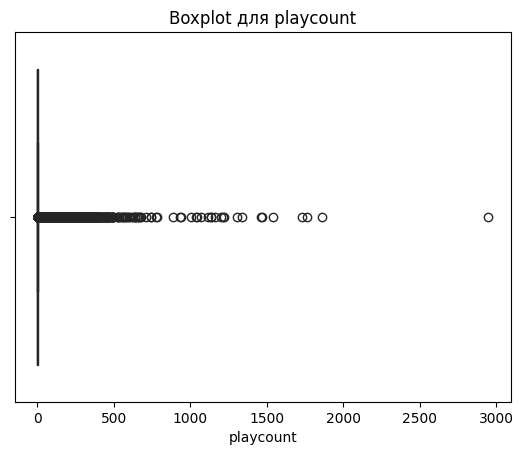

In [ ]:
visualize_boxplot('playcount')

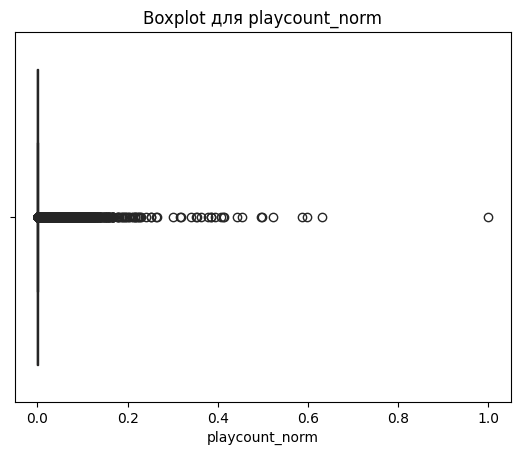

In [ ]:
visualize_boxplot('playcount_norm')

In [ ]:
df.to_csv('Normalized_dataset_users.csv', index=False)